Darlene Eligado (1001889134)

# **Tabular Feasability: Predicting Waterborne Disease Counts Using Global Water Quality and Socioeconomic Indicators**

-----

## Defining Project: 

- Link: https://www.kaggle.com/datasets/khushikyad001/water-pollution-and-disease/data
- The Challenge: Predict waterborne disease counts, such as diarrheal, cholera, and typhoid cases,based on global water quality and socioeconomic data.
- Dataset Info:
    - Shape: (3000, 24)
    - Data types:
        - 20 numerical columns (e.g. pH level, GDP, rainfall)
        - 4 categorical columns (country, region, water source type, water treatment method)
- Plan fot type of ML: supervised ML, regression (RandomForest, XGBoost)
    - Start with separate models (treat each disease as a separate regression task)


-----

## **Data Loading and Initial Look**


In [1]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# load in data
df = pd.read_csv("water_pollution_disease.csv")

df.head()

,Country,Region,Year,Water Source Type,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (µg/L),...,"Cholera Cases per 100,000 people","Typhoid Cases per 100,000 people","Infant Mortality Rate (per 1,000 live births)",GDP per Capita (USD),Healthcare Access Index (0-100),Urbanization Rate (%),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (°C),Population Density (people per km²)
0,Mexico,North,2015,Lake,6.06,7.12,3.93,4.28,8.28,7.89,...,33,44,76.16,57057,96.92,84.61,63.23,2800,4.94,593
1,Brazil,West,2017,Well,5.24,7.84,4.79,3.86,15.74,14.68,...,27,8,77.30,17220,84.73,73.37,29.12,1572,16.93,234
2,Indonesia,Central,2022,Pond,0.24,6.43,0.79,3.42,36.67,9.96,...,39,50,48.45,86022,58.37,72.86,93.56,2074,21.73,57
3,Nigeria,East,2016,Well,7.91,6.71,1.96,3.12,36.92,6.77,...,33,13,95.66,31166,39.07,71.07,94.25,937,3.79,555
4,Mexico,South,2005,Well,0.12,8.16,4.22,9.15,49.35,12.51,...,31,68,58.78,25661,23.03,55.55,69.23,2295,31.44,414


In [2]:
# number of rows & features
dataset_size = df.shape
print("Datset Size: ",dataset_size)

data_types = df.dtypes
print("\nData types:\n",data_types)

Datset Size:  (3000, 24)

Data types:
 Country                                           object
Region                                            object
Year                                               int64
Water Source Type                                 object
Contaminant Level (ppm)                          float64
pH Level                                         float64
Turbidity (NTU)                                  float64
Dissolved Oxygen (mg/L)                          float64
Nitrate Level (mg/L)                             float64
Lead Concentration (µg/L)                        float64
Bacteria Count (CFU/mL)                            int64
Water Treatment Method                            object
Access to Clean Water (% of Population)          float64
Diarrheal Cases per 100,000 people                 int64
Cholera Cases per 100,000 people                   int64
Typhoid Cases per 100,000 people                   int64
Infant Mortality Rate (per 1,000 live births)    

- Dataset Size: (3000, 24)
- 20 Numerical Columns, 4 Categorical

In [3]:
# looking at unique values of categorical columns

# country
df['Country'].unique()

array(['Mexico', 'Brazil', 'Indonesia', 'Nigeria', 'Ethiopia', 'China',
       'Bangladesh', 'India', 'USA', 'Pakistan'], dtype=object)

In [4]:
# region
df['Region'].unique()

array(['North', 'West', 'Central', 'East', 'South'], dtype=object)

In [5]:
# water source type
df['Water Source Type'].unique()

array(['Lake', 'Well', 'Pond', 'Tap', 'River', 'Spring'], dtype=object)

In [6]:
# water treatment method
df['Water Treatment Method'].unique()

array(['Filtration', 'Boiling', nan, 'Chlorination'], dtype=object)

**The 4 Categorical Columns ----**
- **Country**
    - Over 10 countries: Mexico, Brazil, Indonesia, Ethiopia, China, Bangledesh, India, USA, Pakistan
- **Region**
    - North, West, Central, East, South
- **Water Source Type**
    - Lake, 'Well, Pond, Tap, River, Spring
- **Water Treatment Method**
    - Filtration, Boiling, nan, Chlorination
    - nan has possible missing values

In [7]:
# now to looking for missing values
null_data = df.isnull().sum() 
null_data

Country                                            0
Region                                             0
Year                                               0
Water Source Type                                  0
Contaminant Level (ppm)                            0
pH Level                                           0
Turbidity (NTU)                                    0
Dissolved Oxygen (mg/L)                            0
Nitrate Level (mg/L)                               0
Lead Concentration (µg/L)                          0
Bacteria Count (CFU/mL)                            0
Water Treatment Method                           747
Access to Clean Water (% of Population)            0
Diarrheal Cases per 100,000 people                 0
Cholera Cases per 100,000 people                   0
Typhoid Cases per 100,000 people                   0
Infant Mortality Rate (per 1,000 live births)      0
GDP per Capita (USD)                               0
Healthcare Access Index (0-100)               

In [8]:
# look further into where its mostly missing 

missing_counts_country = df[df['Water Treatment Method'].isnull()]['Country'].value_counts()

# to count total rows by country
total_counts_country = df['Country'].value_counts()

# in percentage
percent_missing_country = (missing_counts_country / total_counts_country) * 100

print("Missing Treatment Methods by Country:\n", missing_counts_country, "\n\n", "In percent:\n", percent_missing_country)

Missing Treatment Methods by Country:
 Country
Nigeria       89
USA           87
Indonesia     82
Pakistan      79
Brazil        75
China         73
Mexico        72
Ethiopia      65
India         63
Bangladesh    62
Name: count, dtype: int64 

 In percent:
 Country
Bangladesh    21.305842
Brazil        25.773196
China         23.472669
Ethiopia      22.184300
India         21.724138
Indonesia     26.973684
Mexico        25.000000
Nigeria       28.253968
Pakistan      26.510067
USA           27.272727
Name: count, dtype: float64


In [9]:
# total rows by country
print(total_counts_country)

Country
USA           319
Nigeria       315
China         311
Indonesia     304
Pakistan      298
Ethiopia      293
Brazil        291
Bangladesh    291
India         290
Mexico        288
Name: count, dtype: int64


In [10]:
# now by region
missing_counts_region = df[df['Water Treatment Method'].isnull()]['Region'].value_counts()

# to count total rows by region
total_counts_region = df['Region'].value_counts()

# in percentage
percent_missing_region = (missing_counts_region / total_counts_region) * 100

print("Missing Treatment Methods by Region:\n", missing_counts_region, "\n\n", "In percent:\n", percent_missing_region)

Missing Treatment Methods by Region:
 Region
East       160
North      155
Central    152
West       143
South      137
Name: count, dtype: int64 

 In percent:
 Region
Central    24.877250
East       25.600000
North      26.271186
South      23.620690
West       24.074074
Name: count, dtype: float64


In [11]:
# total rows by region
print(total_counts_region)

Region
East       625
Central    611
West       594
North      590
South      580
Name: count, dtype: int64


In [12]:
# look for possible duplicates
duplicates = df.duplicated().sum()
print('Number of duplicates:', duplicates)

Number of duplicates: 0


**Missing Values -----** 
- Only **Water Treatment Method** has missing values (747)
    - Every country and region has around/almost 25% missing values 
    - Can suspect: data wasn't collected, no treatment used, mix of both
    - **Turn 'nan' into a category 'missing'**

In [13]:
# descriptive stats (rest are numerical)
df.describe()

,Year,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (µg/L),Bacteria Count (CFU/mL),Access to Clean Water (% of Population),"Diarrheal Cases per 100,000 people","Cholera Cases per 100,000 people","Typhoid Cases per 100,000 people","Infant Mortality Rate (per 1,000 live births)",GDP per Capita (USD),Healthcare Access Index (0-100),Urbanization Rate (%),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (°C),Population Density (people per km²)
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2012.012667,4.954390,7.255847,2.480023,6.492850,25.08025,10.047913,2488.477333,64.612333,249.776667,24.25100,49.270000,50.811900,50036.196667,50.029193,50.062480,60.371007,1591.849000,20.130917,505.390333
std,7.229287,2.860072,0.720464,1.419984,2.027966,14.50517,5.798238,1431.421553,20.308463,144.111543,14.33259,28.984165,28.465323,28598.750508,28.896676,22.779125,23.159678,817.502434,11.689244,283.275224
min,2000.000000,0.000000,6.000000,0.000000,3.000000,0.05000,0.000000,0.000000,30.010000,0.000000,0.00000,0.000000,2.060000,521.000000,0.190000,10.030000,20.010000,200.000000,0.060000,10.000000
25%,2006.000000,2.560000,6.630000,1.257500,4.710000,12.52500,5.120000,1268.000000,47.027500,124.000000,12.00000,24.000000,26.467500,25010.250000,24.982500,30.557500,40.440000,865.750000,9.840000,254.750000
50%,2012.000000,4.950000,7.280000,2.460000,6.490000,24.79000,10.065000,2469.000000,64.780000,248.000000,24.00000,49.000000,50.230000,49621.500000,50.390000,49.795000,60.580000,1572.000000,20.175000,513.000000
75%,2018.000000,7.400000,7.870000,3.660000,8.252500,37.91000,15.032500,3736.250000,82.302500,378.000000,37.00000,75.000000,76.260000,74778.250000,74.817500,69.727500,80.420000,2308.250000,30.672500,745.000000
max,2024.000000,10.000000,8.500000,4.990000,10.000000,49.99000,20.000000,4998.000000,99.990000,499.000000,49.00000,99.000000,99.990000,99948.000000,99.980000,89.980000,99.990000,2999.000000,39.990000,999.000000


In [14]:
# looking for outliers 

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# function to find outliers
def find_outliers(data, cols):
    q1 = data[cols].quantile(0.25)
    q3 = data[cols].quantile(0.75)
    iqr = q3 - q1 
    low_bound = q1 - 1.5 * iqr
    up_bound = q3 + 1.5 * iqr
    outliers = data[(data[cols] < low_bound) | (data[cols] > up_bound)]
    return outliers 

for cols in numeric_cols:
    outliers = find_outliers(df, cols)
    print(f"{cols}: {len(outliers)} outliers")

Year: 0 outliers
Contaminant Level (ppm): 0 outliers
pH Level: 0 outliers
Turbidity (NTU): 0 outliers
Dissolved Oxygen (mg/L): 0 outliers
Nitrate Level (mg/L): 0 outliers
Lead Concentration (µg/L): 0 outliers
Bacteria Count (CFU/mL): 0 outliers
Access to Clean Water (% of Population): 0 outliers
Diarrheal Cases per 100,000 people: 0 outliers
Cholera Cases per 100,000 people: 0 outliers
Typhoid Cases per 100,000 people: 0 outliers
Infant Mortality Rate (per 1,000 live births): 0 outliers
GDP per Capita (USD): 0 outliers
Healthcare Access Index (0-100): 0 outliers
Urbanization Rate (%): 0 outliers
Sanitation Coverage (% of Population): 0 outliers
Rainfall (mm per year): 0 outliers
Temperature (°C): 0 outliers
Population Density (people per km²): 0 outliers


**Any outliers?**
- No particuler points significantly differing from other values in the numerical columns

In [15]:
# targets

targets = ['Diarrheal Cases per 100,000 people', 
          'Cholera Cases per 100,000 people',
          'Typhoid Cases per 100,000 people']

for target in targets:
    print(f"{target}:")
    print(df[target].describe(), end="\n\n")

Diarrheal Cases per 100,000 people:
count    3000.000000
mean      249.776667
std       144.111543
min         0.000000
25%       124.000000
50%       248.000000
75%       378.000000
max       499.000000
Name: Diarrheal Cases per 100,000 people, dtype: float64

Cholera Cases per 100,000 people:
count    3000.00000
mean       24.25100
std        14.33259
min         0.00000
25%        12.00000
50%        24.00000
75%        37.00000
max        49.00000
Name: Cholera Cases per 100,000 people, dtype: float64

Typhoid Cases per 100,000 people:
count    3000.000000
mean       49.270000
std        28.984165
min         0.000000
25%        24.000000
50%        49.000000
75%        75.000000
max        99.000000
Name: Typhoid Cases per 100,000 people, dtype: float64



**What is the target?**
- There are 3 targets (3 diseases)
    - Diarrheal: has a max of 499 cases per 100,000 people
    - Typhoid: has a max of 99 cases per 100,000 people
    - Cholera: has a max of 49 cases per 100,000 people
------

## **Data Visualization** 

Distribution of Diseases by **Country**:

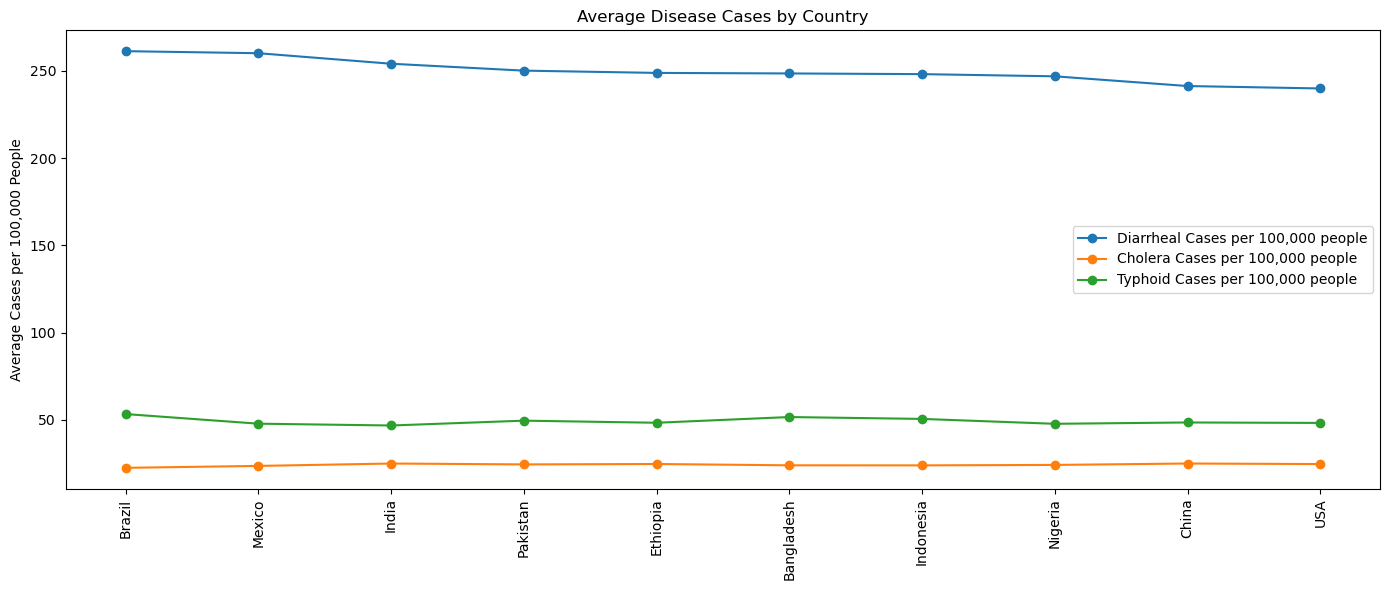

In [16]:
# by Country
country_avg = df.groupby('Country')[targets].mean().sort_values(by=targets[0], ascending=False)

# Plot
plt.figure(figsize=(14, 6))
for disease in targets:
    plt.plot(country_avg.index, country_avg[disease], label=disease, marker='o')

plt.xticks(rotation=90)
plt.ylabel('Average Cases per 100,000 People')
plt.title('Average Disease Cases by Country')
plt.legend()
plt.tight_layout()
plt.show()

Distribution of Diseases by **Region**:

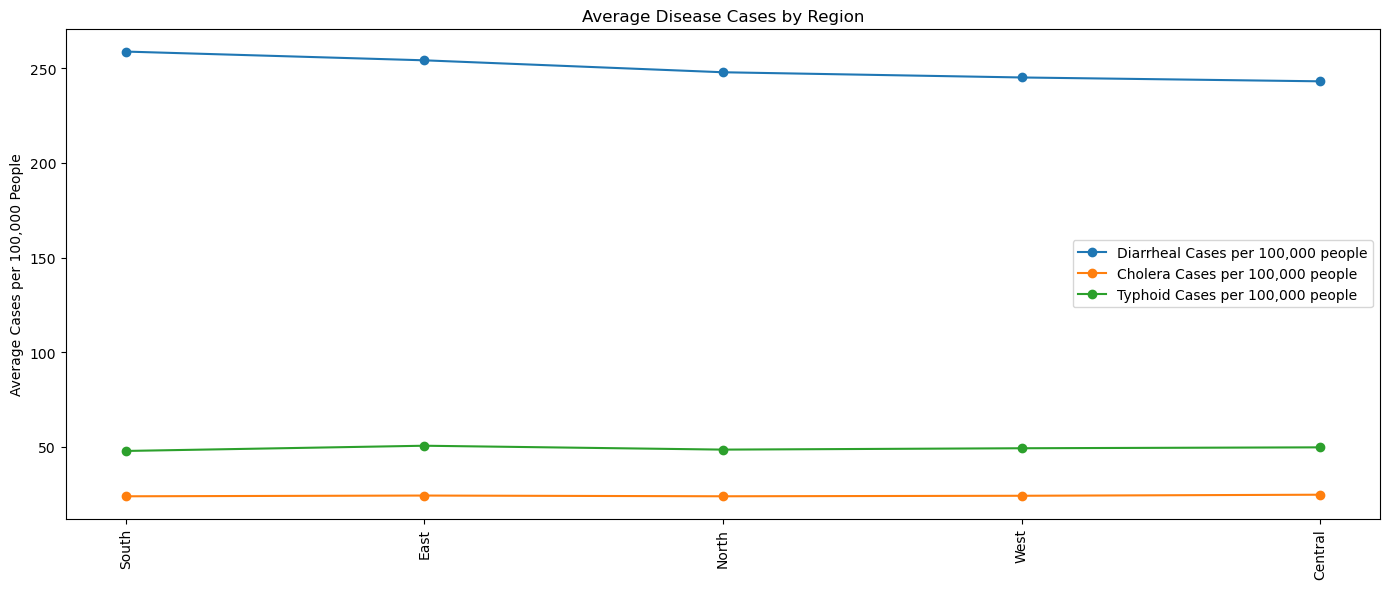

In [17]:
# by region
region_avg = df.groupby('Region')[targets].mean().sort_values(by=targets[0], ascending=False)


plt.figure(figsize=(14, 6))
for disease in targets:
    plt.plot(region_avg.index, region_avg[disease], label=disease, marker='o')

plt.xticks(rotation=90)
plt.ylabel('Average Cases per 100,000 People')
plt.title('Average Disease Cases by Region')
plt.legend()
plt.tight_layout()
plt.show()

Distribution of Diseases by **Water Treatment Method**:

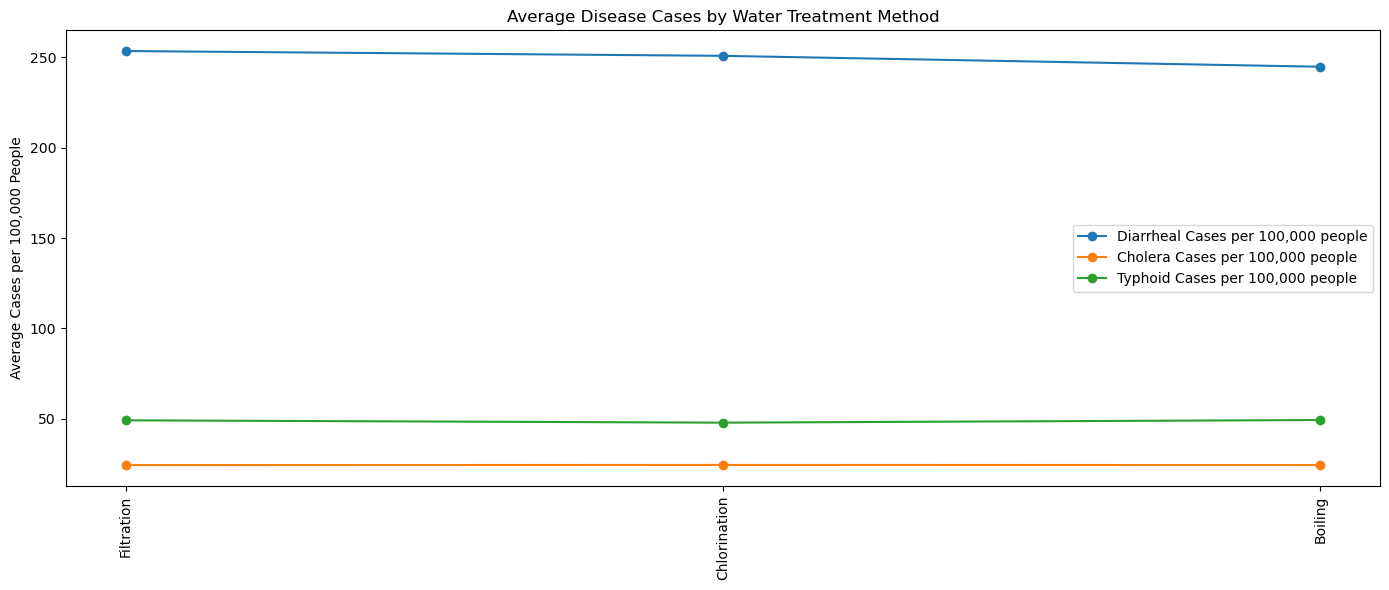

In [18]:
# by water treatment method
treatment_avg = df.groupby('Water Treatment Method')[targets].mean().sort_values(by=targets[0], ascending=False)


plt.figure(figsize=(14, 6))
for disease in targets:
    plt.plot(treatment_avg.index, treatment_avg[disease], label=disease, marker='o')

plt.xticks(rotation=90)
plt.ylabel('Average Cases per 100,000 People')
plt.title('Average Disease Cases by Water Treatment Method')
plt.legend()
plt.tight_layout()
plt.show()

Distribution of Diseases by **Water Source Type**:

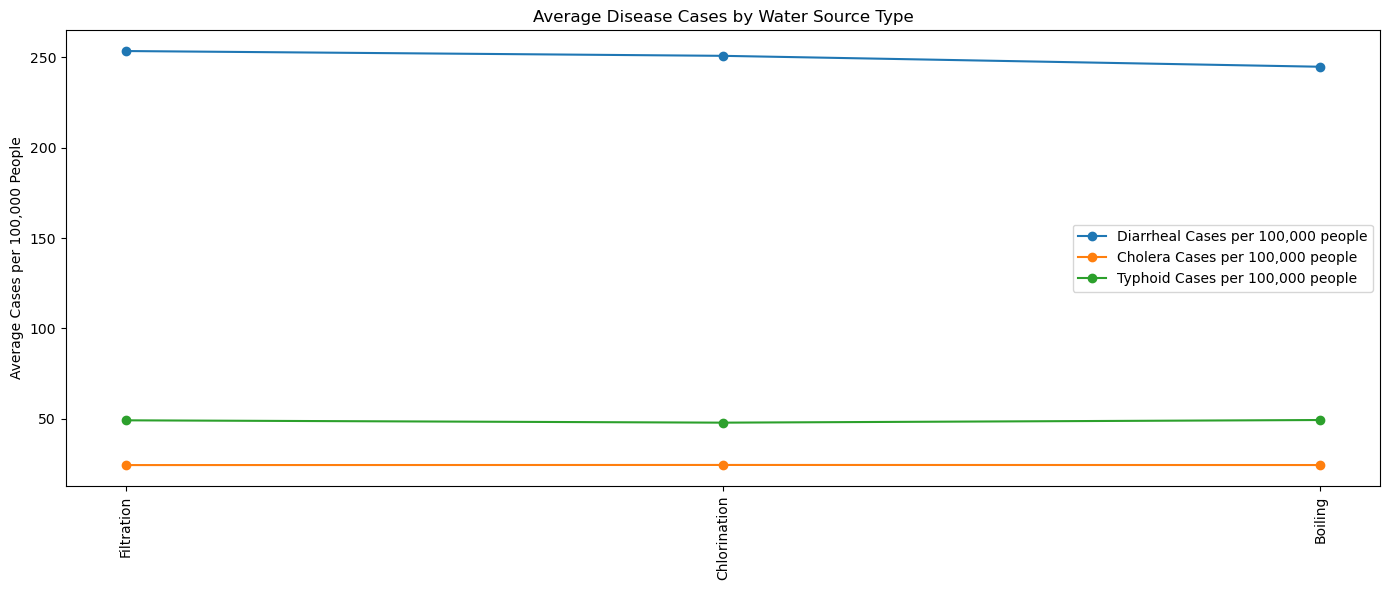

In [19]:
source_avg = df.groupby('Water Source Type')[targets].mean().sort_values(by=targets[0], ascending=False)


plt.figure(figsize=(14, 6))
for disease in targets:
    plt.plot(treatment_avg.index, treatment_avg[disease], label=disease, marker='o')

plt.xticks(rotation=90)
plt.ylabel('Average Cases per 100,000 People')
plt.title('Average Disease Cases by Water Source Type')
plt.legend()
plt.tight_layout()
plt.show()

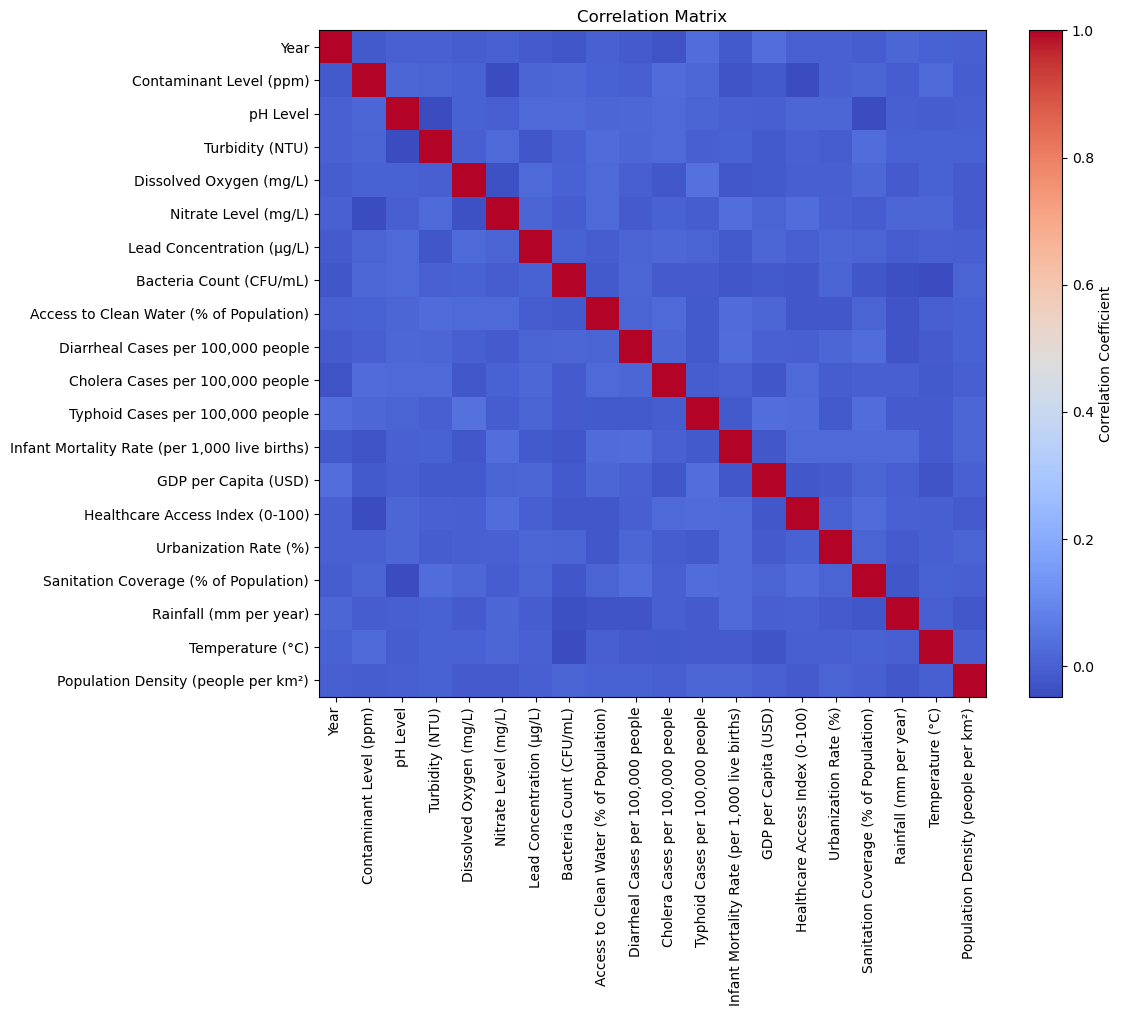

In [20]:
# correlation matrix for numeric columns only
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [21]:
# looking more at correlations
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,Year,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (µg/L),Bacteria Count (CFU/mL),Access to Clean Water (% of Population),"Diarrheal Cases per 100,000 people","Cholera Cases per 100,000 people","Typhoid Cases per 100,000 people","Infant Mortality Rate (per 1,000 live births)",GDP per Capita (USD),Healthcare Access Index (0-100),Urbanization Rate (%),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (°C),Population Density (people per km²)
Year,1.000000,-0.012009,0.002086,0.002336,-0.004248,0.002293,-0.008076,-0.021711,0.004679,-0.009354,-0.030197,0.033197,-0.011524,0.033907,0.003756,0.004420,-0.006379,0.015574,0.007986,0.000411
Contaminant Level (ppm),-0.012009,1.000000,0.015832,0.012436,0.006122,-0.048365,0.012352,0.020452,0.005867,-0.002599,0.027019,0.020529,-0.028094,-0.015153,-0.045862,0.002442,0.012094,-0.005317,0.024128,-0.005532
pH Level,0.002086,0.015832,1.000000,-0.044292,0.007651,-0.000528,0.022519,0.022078,0.015276,0.018386,0.024828,0.011574,0.004177,-0.002972,0.015509,0.017085,-0.047860,-0.001774,-0.007290,-0.001965
Turbidity (NTU),0.002336,0.012436,-0.044292,1.000000,-0.000677,0.021619,-0.022772,0.002440,0.028929,0.016556,0.021453,-0.002389,0.006440,-0.015601,0.001364,-0.004110,0.030491,0.006596,0.007078,0.006886
Dissolved Oxygen (mg/L),-0.004248,0.006122,0.007651,-0.000677,1.000000,-0.033023,0.021765,0.005714,0.022059,-0.003231,-0.017889,0.041853,-0.018998,-0.015512,-0.001830,-0.001918,0.019067,-0.007434,0.008028,-0.010568
Nitrate Level (mg/L),0.002293,-0.048365,-0.000528,0.021619,-0.033023,1.000000,0.010875,-0.004577,0.023942,-0.010578,0.007948,-0.007345,0.037444,0.012970,0.029534,0.004033,-0.006235,0.016400,0.013920,-0.011292
Lead Concentration (µg/L),-0.008076,0.012352,0.022519,-0.022772,0.021765,0.010875,1.000000,0.006492,-0.007212,0.009597,0.018696,0.012994,-0.012964,0.016625,0.000638,0.015852,0.009590,-0.006791,0.004307,-0.002754
Bacteria Count (CFU/mL),-0.021711,0.020452,0.022078,0.002440,0.005714,-0.004577,0.006492,1.000000,-0.011875,0.015419,-0.010092,-0.011258,-0.020969,-0.012221,-0.017679,0.012910,-0.020361,-0.039331,-0.046582,0.009718
Access to Clean Water (% of Population),0.004679,0.005867,0.015276,0.028929,0.022059,0.023942,-0.007212,-0.011875,1.000000,0.009076,0.022508,-0.015023,0.027276,0.016690,-0.016930,-0.017113,0.012890,-0.024775,-0.000029,0.008631
"Diarrheal Cases per 100,000 people",-0.009354,-0.002599,0.018386,0.016556,-0.003231,-0.010578,0.009597,0.015419,0.009076,1.000000,0.014747,-0.012675,0.031683,0.002447,-0.000706,0.015574,0.033032,-0.023887,-0.007984,0.006277


In [22]:
# using a function to look for correlations that affect the gtargets 

for target in targets:
    print(f"\n Top correlations with {target}:")

    target_corr = correlation_matrix[target].drop(target)
    
    # sort by strongest
    top_corr = target_corr.reindex(target_corr.abs().sort_values(ascending=False).index)
    print(top_corr)


 Top correlations with Diarrheal Cases per 100,000 people:
Sanitation Coverage (% of Population)            0.033032
Infant Mortality Rate (per 1,000 live births)    0.031683
Rainfall (mm per year)                          -0.023887
pH Level                                         0.018386
Turbidity (NTU)                                  0.016556
Urbanization Rate (%)                            0.015574
Bacteria Count (CFU/mL)                          0.015419
Cholera Cases per 100,000 people                 0.014747
Typhoid Cases per 100,000 people                -0.012675
Nitrate Level (mg/L)                            -0.010578
Lead Concentration (µg/L)                        0.009597
Year                                            -0.009354
Access to Clean Water (% of Population)          0.009076
Temperature (°C)                                -0.007984
Population Density (people per km²)              0.006277
Dissolved Oxygen (mg/L)                         -0.003231
Contaminant 

**Observations**
- all correlation values are VERY LOW :,) for all 3 disease targets 
- focus more on tree-based models (RandomForest, XGBoost)

**What to do next??**
- Encode categorical features 
- try to use models to find feature importance

------
## **Data Cleaning and Preperation for ML**

**Will be doing Diarrheal Cases per 100,000 people first** and drop Cholera and Typhoid Cases

In [23]:
# making a new df to preprocess and clean
df_prep = df.copy()
df_prep.head()

,Country,Region,Year,Water Source Type,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (µg/L),...,"Cholera Cases per 100,000 people","Typhoid Cases per 100,000 people","Infant Mortality Rate (per 1,000 live births)",GDP per Capita (USD),Healthcare Access Index (0-100),Urbanization Rate (%),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (°C),Population Density (people per km²)
0,Mexico,North,2015,Lake,6.06,7.12,3.93,4.28,8.28,7.89,...,33,44,76.16,57057,96.92,84.61,63.23,2800,4.94,593
1,Brazil,West,2017,Well,5.24,7.84,4.79,3.86,15.74,14.68,...,27,8,77.30,17220,84.73,73.37,29.12,1572,16.93,234
2,Indonesia,Central,2022,Pond,0.24,6.43,0.79,3.42,36.67,9.96,...,39,50,48.45,86022,58.37,72.86,93.56,2074,21.73,57
3,Nigeria,East,2016,Well,7.91,6.71,1.96,3.12,36.92,6.77,...,33,13,95.66,31166,39.07,71.07,94.25,937,3.79,555
4,Mexico,South,2005,Well,0.12,8.16,4.22,9.15,49.35,12.51,...,31,68,58.78,25661,23.03,55.55,69.23,2295,31.44,414


In [24]:
# fill in 'nan' in Water Treatment Method as new category 'Missing'
df_prep['Water Treatment Method'] = df['Water Treatment Method'].fillna('Missing')

# check its unique values
df_prep['Water Treatment Method'].unique()

array(['Filtration', 'Boiling', 'Missing', 'Chlorination'], dtype=object)

In [25]:
# categorical columns
categorical_cols = ['Water Treatment Method','Region', 'Country', 'Water Source Type']

In [26]:
# make Diarrheal Cases as the target column & drop other diseases for now
target_diarrheal = 'Diarrheal Cases per 100,000 people'
other_diseases = ['Cholera Cases per 100,000 people', 'Typhoid Cases per 100,000 people']

df_diarrheal_prep = df_prep.drop(columns=[col for col in other_diseases if col in df_prep.columns])

numerical_prep1 = [col for col in df_diarrheal_prep.columns if df_diarrheal_prep[col].dtype in ['float64','int64']
                  and col not in categorical_cols + [target_diarrheal]] 

In [27]:
# start endcoding the categorical columns 
df_diarrheal_encode = pd.get_dummies(df_diarrheal_prep[categorical_cols], drop_first=True)
df_diarrheal_encode.dtypes

Water Treatment Method_Chlorination    bool
Water Treatment Method_Filtration      bool
Water Treatment Method_Missing         bool
Region_East                            bool
Region_North                           bool
Region_South                           bool
Region_West                            bool
Country_Brazil                         bool
Country_China                          bool
Country_Ethiopia                       bool
Country_India                          bool
Country_Indonesia                      bool
Country_Mexico                         bool
Country_Nigeria                        bool
Country_Pakistan                       bool
Country_USA                            bool
Water Source Type_Pond                 bool
Water Source Type_River                bool
Water Source Type_Spring               bool
Water Source Type_Tap                  bool
Water Source Type_Well                 bool
dtype: object

In [28]:
df_diarrheal_prep.dtypes

Country                                           object
Region                                            object
Year                                               int64
Water Source Type                                 object
Contaminant Level (ppm)                          float64
pH Level                                         float64
Turbidity (NTU)                                  float64
Dissolved Oxygen (mg/L)                          float64
Nitrate Level (mg/L)                             float64
Lead Concentration (µg/L)                        float64
Bacteria Count (CFU/mL)                            int64
Water Treatment Method                            object
Access to Clean Water (% of Population)          float64
Diarrheal Cases per 100,000 people                 int64
Infant Mortality Rate (per 1,000 live births)    float64
GDP per Capita (USD)                               int64
Healthcare Access Index (0-100)                  float64
Urbanization Rate (%)          

In [29]:
# combine numerical and categorical & check if correlations are better 
df_model_ready = pd.concat([df_diarrheal_prep[numerical_prep1], df_diarrheal_encode, df_diarrheal_prep[[target_diarrheal]]], axis=1)


print("Top positively correlated features with", target_diarrheal)
print(df_model_ready.corr()[target_diarrheal].sort_values(ascending=False).head(10))

print("\n\nTop negativley correlated features with", target_diarrheal)
print(df_model_ready.corr()[target_diarrheal].sort_values(ascending=False).tail(10))

Top positively correlated features with Diarrheal Cases per 100,000 people
Diarrheal Cases per 100,000 people               1.000000
Water Source Type_Tap                            0.039820
Sanitation Coverage (% of Population)            0.033032
Infant Mortality Rate (per 1,000 live births)    0.031683
Region_South                                     0.030641
Country_Brazil                                   0.026303
Country_Mexico                                   0.023499
pH Level                                         0.018386
Turbidity (NTU)                                  0.016556
Region_East                                      0.015668
Name: Diarrheal Cases per 100,000 people, dtype: float64


Top negativley correlated features with Diarrheal Cases per 100,000 people
Country_Nigeria           -0.006767
Temperature (°C)          -0.007984
Year                      -0.009354
Nitrate Level (mg/L)      -0.010578
Region_West               -0.016060
Country_China             -0.01

**Diarrheal Cases – Analysis**
- correlations between features and diarrheal cases are still weak (all below +0.04).
- top features include:
    - Water Source Type_Tap (+0.0398)
    - Sanitation Coverage (+0.0330)
    - Infant Mortality Rate (+0.0316)
- categorical features (like region and country) showed slightly correlations than numeric ones

----

#### **Now to repeat the same for Typhoid Cases**

In [30]:
# make Typhoid Cases as the target column & drop other diseases for now
target_typhoid = 'Typhoid Cases per 100,000 people'
other_diseases2 = ['Cholera Cases per 100,000 people', ' Diarrheal Cases per 100,000 people']

df_typhoid_prep = df_prep.drop(columns=[col for col in other_diseases2 if col in df_prep.columns])

numerical_prep2 = [col for col in df_typhoid_prep.columns if df_typhoid_prep[col].dtype in ['float64','int64']
                  and col not in categorical_cols + [target_typhoid]] 

In [31]:
# start endcoding the categorical columns 
df_typhoid_encode = pd.get_dummies(df_typhoid_prep[categorical_cols], drop_first=True)
df_typhoid_encode.dtypes

Water Treatment Method_Chlorination    bool
Water Treatment Method_Filtration      bool
Water Treatment Method_Missing         bool
Region_East                            bool
Region_North                           bool
Region_South                           bool
Region_West                            bool
Country_Brazil                         bool
Country_China                          bool
Country_Ethiopia                       bool
Country_India                          bool
Country_Indonesia                      bool
Country_Mexico                         bool
Country_Nigeria                        bool
Country_Pakistan                       bool
Country_USA                            bool
Water Source Type_Pond                 bool
Water Source Type_River                bool
Water Source Type_Spring               bool
Water Source Type_Tap                  bool
Water Source Type_Well                 bool
dtype: object

In [32]:
df_typhoid_prep.dtypes

Country                                           object
Region                                            object
Year                                               int64
Water Source Type                                 object
Contaminant Level (ppm)                          float64
pH Level                                         float64
Turbidity (NTU)                                  float64
Dissolved Oxygen (mg/L)                          float64
Nitrate Level (mg/L)                             float64
Lead Concentration (µg/L)                        float64
Bacteria Count (CFU/mL)                            int64
Water Treatment Method                            object
Access to Clean Water (% of Population)          float64
Diarrheal Cases per 100,000 people                 int64
Typhoid Cases per 100,000 people                   int64
Infant Mortality Rate (per 1,000 live births)    float64
GDP per Capita (USD)                               int64
Healthcare Access Index (0-100)

In [33]:
# combine numerical and categorical & check if correlations are better 
df_typhoid_ready = pd.concat([df_typhoid_prep[numerical_prep2], df_typhoid_encode, df_typhoid_prep[[target_typhoid]]], axis=1)


print("Top positively correlated features with", target_typhoid)
print(df_typhoid_ready.corr()[target_typhoid].sort_values(ascending=False).head(10))

print("\n\nTop negativley correlated features with", target_typhoid)
print(df_typhoid_ready.corr()[target_typhoid].sort_values(ascending=False).tail(10))

Top positively correlated features with Typhoid Cases per 100,000 people
Typhoid Cases per 100,000 people         1.000000
Country_Brazil                           0.046266
Dissolved Oxygen (mg/L)                  0.041853
GDP per Capita (USD)                     0.036852
Year                                     0.033197
Water Treatment Method_Missing           0.029560
Sanitation Coverage (% of Population)    0.029559
Healthcare Access Index (0-100)          0.025621
Region_East                              0.024337
Water Source Type_Pond                   0.023951
Name: Typhoid Cases per 100,000 people, dtype: float64


Top negativley correlated features with Typhoid Cases per 100,000 people
Urbanization Rate (%)                           -0.012507
Diarrheal Cases per 100,000 people              -0.012675
Infant Mortality Rate (per 1,000 live births)   -0.014369
Access to Clean Water (% of Population)         -0.015023
Country_Mexico                                  -0.015921
Country

**Typhoid Cases – Analysis**
- correlations have top values below -0.05, still weak
- typhoid's top positive features include:
    - Country_Brazil (+0.0463), more prominent in Brazil
    - Dissolved Oxygen (+0.0419)
    - GDP per Capita (+0.0369)
- missing water treatment data (Water Treatment Method_Missing) also plays a positive
- typhoid may relate more to economic, regional, and treatment access factors than water quality alone

----

#### **Lastly repeat process again for Cholera Cases**

In [34]:
# make Cholera Cases as the target column & drop other diseases for now
target_cholera = 'Cholera Cases per 100,000 people'
other_diseases3 = ['Typhoid Cases per 100,000 people', ' Diarrheal Cases per 100,000 people']

df_cholera_prep = df_prep.drop(columns=[col for col in other_diseases3 if col in df_prep.columns])

numerical_prep3 = [col for col in df_cholera_prep.columns if df_cholera_prep[col].dtype in ['float64','int64']
                  and col not in categorical_cols + [target_cholera]]

In [35]:
# start endcoding the categorical columns 
df_cholera_encode = pd.get_dummies(df_cholera_prep[categorical_cols], drop_first=True)
df_cholera_encode.dtypes

Water Treatment Method_Chlorination    bool
Water Treatment Method_Filtration      bool
Water Treatment Method_Missing         bool
Region_East                            bool
Region_North                           bool
Region_South                           bool
Region_West                            bool
Country_Brazil                         bool
Country_China                          bool
Country_Ethiopia                       bool
Country_India                          bool
Country_Indonesia                      bool
Country_Mexico                         bool
Country_Nigeria                        bool
Country_Pakistan                       bool
Country_USA                            bool
Water Source Type_Pond                 bool
Water Source Type_River                bool
Water Source Type_Spring               bool
Water Source Type_Tap                  bool
Water Source Type_Well                 bool
dtype: object

In [36]:
df_cholera_prep.dtypes

Country                                           object
Region                                            object
Year                                               int64
Water Source Type                                 object
Contaminant Level (ppm)                          float64
pH Level                                         float64
Turbidity (NTU)                                  float64
Dissolved Oxygen (mg/L)                          float64
Nitrate Level (mg/L)                             float64
Lead Concentration (µg/L)                        float64
Bacteria Count (CFU/mL)                            int64
Water Treatment Method                            object
Access to Clean Water (% of Population)          float64
Diarrheal Cases per 100,000 people                 int64
Cholera Cases per 100,000 people                   int64
Infant Mortality Rate (per 1,000 live births)    float64
GDP per Capita (USD)                               int64
Healthcare Access Index (0-100)

In [37]:
# combine numerical and categorical & check if correlations are better 
df_cholera_ready = pd.concat([df_cholera_prep[numerical_prep3], df_cholera_encode, df_cholera_prep[[target_cholera]]], axis=1)


print("Top positively correlated features with", target_cholera)
print(df_cholera_ready.corr()[target_cholera].sort_values(ascending=False).head(10))

print("\n\nTop negativley correlated features with", target_cholera)
print(df_cholera_ready.corr()[target_cholera].sort_values(ascending=False).tail(10))

Top positively correlated features with Cholera Cases per 100,000 people
Cholera Cases per 100,000 people           1.000000
Water Source Type_River                    0.033285
Contaminant Level (ppm)                    0.027019
pH Level                                   0.024828
Healthcare Access Index (0-100)            0.024202
Access to Clean Water (% of Population)    0.022508
Turbidity (NTU)                            0.021453
Lead Concentration (µg/L)                  0.018696
Country_China                              0.018462
Country_India                              0.017649
Name: Cholera Cases per 100,000 people, dtype: float64


Top negativley correlated features with Cholera Cases per 100,000 people
Region_South                     -0.010519
Temperature (°C)                 -0.013043
Country_Mexico                   -0.013683
Water Source Type_Pond           -0.016804
Dissolved Oxygen (mg/L)          -0.017889
Water Treatment Method_Missing   -0.020037
GDP per Capita (USD

**Cholera Cases – Analysis**
- correlations are still weak overall, with all values below +0.04 similar to the others
- Top positive features include:
    - Water Source Type_River (+0.0333)
    - Contaminant Level (+0.0270)
    - pH Level (+0.0248)
- some weak correlations between healthcare access and clean water availability
- cholera shows a slight relationship with water contaminants, the type of water source, and regional characteristics, but no single factor is a strong predictor

----
**Top Positive Features Comparison:**

- **Diarrheal** 
    - Water Source Type_Tap (+0.0398)
    - Sanitation Coverage (+0.0330)
    - Infant Mortality Rate (+0.0317)
    - Region_South (+0.0306)
    - Country_Brazil (+0.0263)
    - Country_Mexico (+0.0235)
    - pH Level (+0.0184)
    - Turbidity (+0.0166)
    - Region_East (+0.0157)
    
- **Typhoid**
    - Country_Brazil (+0.0463)
    - Dissolved Oxygen (+0.0419)
    - GDP per Capita (+0.0369)
    - Year (+0.0332)
    - Water Treatment Missing (+0.0296)
    - Sanitation Coverage (+0.0296)
    - Healthcare Access (+0.0256)
    - Region_East (+0.0243)
    - Water Source Type_Pond (+0.0240)

- **Cholera**
    - Water Source Type_River (+0.0333)
    - Contaminant Level (+0.0270)
    - pH Level (+0.0248)
    - Healthcare Access (+0.0242)
    - Access to Clean Water (+0.0225)
    - Turbidity (+0.0215)
    - Lead Concentration (+0.0187)
    - Country_China (+0.0185)
    - Country_India (+0.0176)


**Top Positive Features Comparison:**

- **Diarrheal:** Water Source Type_River, Rainfall, Country_USA

- **Typhoid:** Water Treatment_Chlorination, Country_India, Region_South

- **Cholera:** Country_Brazil, Spring Water, Year, GDP per Capita


**Analysis Across the Diseases**
- No disease has strong linear correlations (all are less than +0.05), which suggests to use nonlinear models
- Diarrheal cases are more related to sanitation, infant mortality rates, and basic infrastructure
- Typhoid has some weak connections to economic factors and water oxygen levels
- Cholera is more associated with water contamination, pH levels, and the type of water source, especially river water
- Country and regional factors have a small but distinct impact on each disease

---

In [38]:
# save each cleaned and encoded dataframes for ML 
df_model_ready.to_csv('diarrhea_ml_ready.csv', index=False)
df_typhoid_ready.to_csv('typhoid_ml_ready.csv', index=False)
df_cholera_ready.to_csv('cholera_ml_ready.csv', index=False)